In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-upwind-cfl)

For time stepping, we use the adaptive explicit method `RK45`.

In [2]:
from scipy.integrate import solve_ivp
x, Dx, Dxx = FNC.diffper(400, [0, 1])
u_init = exp(-80 * (x - 0.5) ** 2)
c = 2
ode = lambda t, u: -c * (Dx @ u)
sol = solve_ivp(ode, (0, 2), u_init, method="RK45", dense_output=True)
u = sol.sol

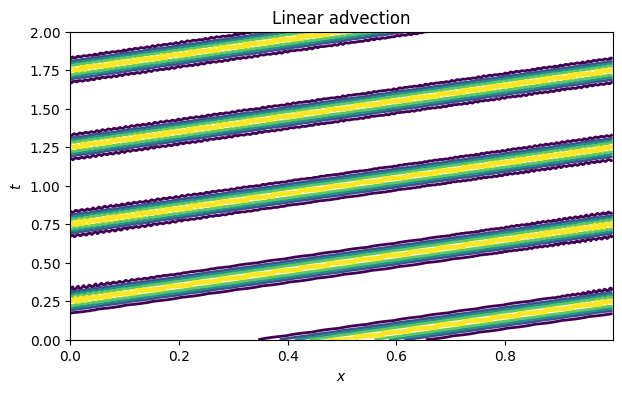

In [3]:
t = linspace(0, 2, 81)
U = vstack([u(tj) for tj in t])
contour(x, t, U, levels=arange(0.15, 1.0, 0.2))
xlabel("$x$"),  ylabel("$t$")
title("Linear advection");

In the space-time plot above, you can see the initial hump traveling rightward at constant speed. It fully traverses the domain once for each integer multiple of $t=1/2$. 

If we cut $h$ by a factor of 2 (i.e., double $m$), then the CFL condition suggests that the time step should be cut by a factor of 2 also.

In [4]:
print(f"{len(sol.t) - 1} time steps taken for m = 400")
x, Dx, Dxx = FNC.diffper(800, [0, 1])
u_init = exp(-80 * (x - 0.5) ** 2)
sol = solve_ivp(ode, (0, 2), u_init, method="RK45", dense_output=True)
print(f"{len(sol.t) - 1} time steps taken for m = 800")

1416 time steps taken for m = 400


2906 time steps taken for m = 800
